In [1]:
%matplotlib inline 
# plots graphs within the notebook
%config InlineBackend.figure_format='svg' # not sure what this does, may be default images to svg format

from IPython.display import display,Image, Latex
from __future__ import division
from sympy.interactive import printing
printing.init_printing(use_latex='mathjax')
from IPython.display import clear_output

import time

from IPython.display import display,Image, Latex

from IPython.display import clear_output


import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.constants as sc
import h5py

import sympy as sym

    
font = {'family' : 'serif',
        #'color'  : 'black',
        'weight' : 'normal',
        'size'   : 16,
        }
fontlabel = {'family' : 'serif',
        #'color'  : 'black',
        'weight' : 'normal',
        'size'   : 16,
        }

from matplotlib.ticker import FormatStrFormatter
plt.rc('font', **font)

class PDF(object):
  def __init__(self, pdf, size=(200,200)):
    self.pdf = pdf
    self.size = size

  def _repr_html_(self):
    return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)

  def _repr_latex_(self):
    return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)

class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)
    
font = {'family' : 'serif',
        #'color'  : 'black',
        'weight' : 'normal',
        'size'   : 16,
        }
fontlabel = {'family' : 'serif',
        #'color'  : 'black',
        'weight' : 'normal',
        'size'   : 16,
        }

from matplotlib.ticker import FormatStrFormatter
plt.rc('font', **font)

from scipy.sparse import csr_matrix
def nufd(x):
    n = len(x)
    h = x[1:]-x[:n-1]
    a0 = -(2*h[0]+h[1])/(h[0]*(h[0]+h[1]))
    ak = -h[1:]/(h[:n-2]*(h[:n-2]+h[1:]))
    an = h[-1]/(h[-2]*(h[-1]+h[-2]))
    b0 = (h[0]+h[1])/(h[0]*h[1]) 
    bk = (h[1:] - h[:n-2])/(h[:n-2]*h[1:])
    bn = -(h[-1]+h[-2])/(h[-1]*h[-2])
    c0 = -h[0]/(h[1]*(h[0]+h[1]))
    ck = h[:n-2]/(h[1:]*(h[:n-2]+h[1:]))
    cn = (2*h[-1]+h[-2])/(h[-1]*(h[-2]+h[-1]))
    val  = np.hstack((a0,ak,an,b0,bk,bn,c0,ck,cn))
    row = np.tile(np.arange(n),3)
    dex = np.hstack((0,np.arange(n-2),n-3))
    col = np.hstack((dex,dex+1,dex+2))
    D = csr_matrix((val,(row,col)),shape=(n,n))
    return D

In [2]:
import numpy as np
def TDMAsolver(a, b, c, d):
    '''
    TDMA solver, a b c d can be NumPy array type or Python list type.
    refer to http://en.wikipedia.org/wiki/Tridiagonal_matrix_algorithm
    '''
    nf = len(a)     # number of equations
    ac, bc, cc, dc = map(np.array, (a, b, c, d))     # copy the array
    for it in range(1, nf):
        mc = ac[it]/bc[it-1]
        bc[it] = bc[it] - mc*cc[it-1] 
        dc[it] = dc[it] - mc*dc[it-1]

    xc = ac
    xc[-1] = dc[-1]/bc[-1]

    for il in range(nf-2, -1, -1):
        xc[il] = (dc[il]-cc[il]*xc[il+1])/bc[il]

    del bc, cc, dc  # delete variables from memory

    return xc

In [3]:
from scipy.optimize import fsolve
def find_gamma(ly,y_uni,dy_min,g_ini):
    def delta_tanh(g):
        return ly/2.0*np.tanh(g*(y_uni[1]))/np.tanh(g*ly/2.0)-(-ly/2+dy_min)
    g_dy_min = fsolve(delta_tanh,g_ini)
    return g_dy_min
def stretched_mesh(ly,ny,dy_min,g_ini):
    y_uni = np.linspace(-ly/2, ly/2, ny)
    gamma_y = find_gamma(ly,y_uni,dy_min,g_ini)
    y_s = ly/2.0*np.tanh(gamma_y*(y_uni))/np.tanh(gamma_y*ly/2.0)
    return y_s,gamma_y

In [4]:
nz = 129

lz = 0.30
dz_min = lz / 1000

z,gz = stretched_mesh(lz,nz,dz_min,28)

In [5]:
print(gz)
z += lz/2

[14.07146409]


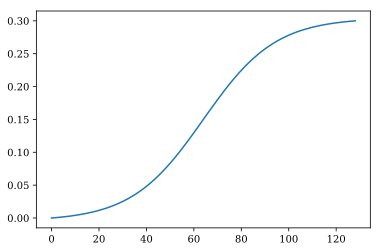

In [6]:
plt.plot(z)

In [7]:
print(z[0],z[-1])
mask = np.where(np.abs(z-0.1)< 0.01)
print(mask,z[mask])

0.0 0.3
(array([52, 53, 54, 55]),) [0.09187103 0.09629731 0.10082623 0.10545123]


In [8]:
import pandas as pd
from pandas import Series

sensor811 = pd.read_excel("Insulation/SN 20103811 2018-07-16 13_18_09 -0400.xlsx",sheet_name="DATA",
                          header=1,date_parser=[1],names=["#","timestamp","probe1","probe2"])
sensor811 = sensor811.set_index('timestamp')
sensor811 = sensor811.drop("#",axis=1)
sensor934 = pd.read_excel("Insulation/SN 20366934 2018-07-16 13_19_37 -0400.xlsx",sheet_name="DATA",
                          header=1,date_parser=[0],names=["#","timestamp","probe1","probe2"])
sensor934 = sensor934.set_index('timestamp')
sensor934 = sensor934.drop("#",axis=1)

## Probe locations

### Reflective blanket + mulch + concrete curing blanket
\begin{array}{|c|c|c|l|}
\hline
HOBO & Channel & Location & Note \\
\hline
934 & 2 & 46cm &\\
811 & 1 & 30 cm & below reflective\\
934 & 1 & 10 cm & \\
811 & 2 & 0 cm & on snow\\
\hline
\end{array}


### Reflective blanket + open cell foam + concrete curing blanket
\begin{array}{|c|c|c|}
\hline
HOBO & Channel & Location \\
\hline
930 & 1 & 46cm\\
930 & 2 & 30 cm\\
812 & 2 & 10 cm \\
812 & 1 & 0 cm\\
\hline
\end{array}

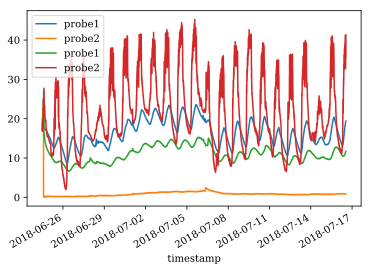

In [9]:
# print(sensor811.timestamp)
ax = sensor811.plot()
sensor934.plot(ax = ax)

In [10]:
alt0 = np.copy(sensor811.probe2)
alt30 = np.copy(sensor811.probe1)
alt10 = np.copy(sensor934.probe1)
alt46 = np.copy(sensor934.probe2)


In [11]:
from scipy import signal
Ts = 5*60
freqs = 1/Ts

f,P0 = signal.periodogram(x=alt0[100:],fs=freqs, scaling='spectrum' )
f,P30 = signal.periodogram(x=alt30[100:],fs=freqs, scaling='spectrum' )
f1,P10 = signal.periodogram(x=alt10[100:],fs=freqs, scaling='spectrum' )
f1,P46 = signal.periodogram(x=alt46[100:],fs=freqs, scaling='spectrum' )


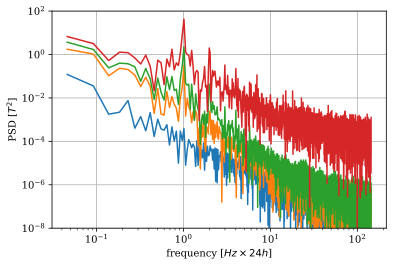

In [12]:
plt.loglog(f[1:]*24*3600,P0[1:])
plt.loglog(f1[1:]*24*3600,P10[1:])
plt.loglog(f[1:]*24*3600,P30[1:])
plt.loglog(f1[1:]*24*3600,P46[1:])
plt.xlabel(r'frequency [$Hz\times24h$]')
plt.ylabel(r'PSD [$T^2$]')
plt.ylim(1e-8,1e2)
plt.grid(True)
plt.show()

In [13]:
tstart = sensor811.index[0]
print(tstart)
n = sensor811.shape[0]
print(n)
tend = sensor811.index[n-1]
print(tend)
print(pd.Timedelta(tend-tstart))


2018-06-24 11:53:58
6353
2018-07-16 13:13:58
22 days 01:20:00


In [14]:
def diffusion_matrix_coefficients(alpha):
    """ arguments must be from bottom wall to top wall of dimensions N+2
        returns a,b,c of dimensions N (from first to last points off the walls)"""
    global dt_2, a_metrics, c_metrics
    n = len(alpha)
    a = np.zeros(n-2)
    b = np.zeros(n-2)
    c = np.zeros(n-2)
    a[:] = (alpha[0:-2] + alpha[1:-1])*a_metrics[:]
    c[:] = (alpha[2:] + alpha[1:-1])*c_metrics[:]
    b = -(a+c)
    a *= dt_2
    b *= dt_2
    c *= dt_2
    return a,b,c
def rhs_T(a_rhs,b_rhs,c_rhs,a_lhs,c_lhs,T_old_all,T_all):
    global dt_2,dt
    d = a_rhs*T_old_all[:-2] + (b_rhs + 1)*T_old_all[1:-1] + c_rhs*T_old_all[2:]
    d[0] += a_lhs[0]*T_all[0]
    d[-1] += c_lhs[-1]*T_all[-1]
    return d

In [15]:
dt = 5*60.
n10 = 54
T_ini = 20.
dt_2 = dt / 2
def k(z):
    return 0.48*(1+(z/lz)**0.9)
    
# k = #0.48
rho = 500.
def Cp(T):
    return 3.867 *(T + 273.15) +103.1



a_metrics = np.zeros(nz-2)
c_metrics = np.zeros(nz-2)
a_metrics[:] = 1. / ((z[1:-1] - z[0:-2])*(z[2:]-z[0:-2]))
c_metrics[:] = 1. / ((z[2:] - z[1:-1])*(z[2:]-z[0:-2]))
dz = nufd(z)

a_rhs = np.zeros(nz-2)
b_rhs = np.zeros(nz-2)
c_rhs = np.zeros(nz-2)
a_lhs = np.zeros(nz-2)
b_lhs = np.zeros(nz-2)
c_lhs = np.zeros(nz-2)

T = T_ini*np.ones(nz)
Sim_time = 22*24*3600

Nt = int(Sim_time/dt)
T10 = np.zeros(Nt+1)


def bottom_T(i):
    global alt0
    return alt0[i]
def top_T(i):
    global alt30
    return alt30[i]
T[0] = bottom_T(0)
T[-1] = top_T(0)
i = 0
isample = 0
Sim_t = 0
while Sim_t < Sim_time:
    
    Sim_t += dt
    a_rhs = np.copy(a_lhs)
    b_rhs = np.copy(b_lhs)
    c_rhs = np.copy(c_lhs)

    T_old = np.copy(T)
    T[0] = bottom_T(i)
    T[-1] = top_T(i)
    
    error = np.inf
    Titold = np.copy(T)
    j = 0
    while error > 1e-5 and j < 100:
        alpha_total_all = k(z)/(rho*Cp(T))
        a_lhs, b_lhs, c_lhs = diffusion_matrix_coefficients(alpha_total_all)
        d = rhs_T(a_rhs, b_rhs, c_rhs, a_lhs, c_lhs, T_old, T)
    #     print(d)
        T[1:-1] = TDMAsolver(-a_lhs, 1-b_lhs , -c_lhs, d)
        error = np.linalg.norm(T-Titold,2)/np.mean(T)
        Titold = np.copy(T)
        j += 1
    print(j,error)
    i += 1
    T10[i] = T[n10]
    print(i,Sim_t/Sim_time*100)
    clear_output(wait=True)

3 9.092117623346464e-09
6336 100.0


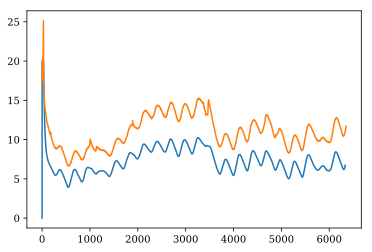

In [16]:
plt.plot(T10)
plt.plot(alt10)
plt.show()

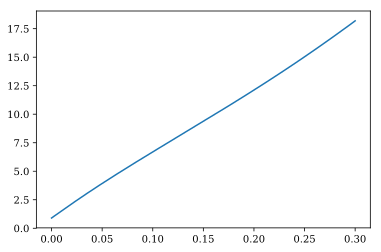

In [17]:
plt.plot(z,T)

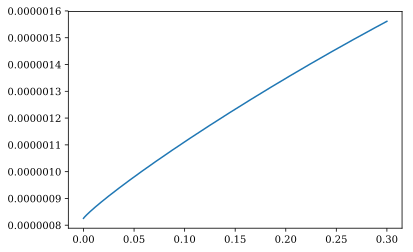

In [18]:
plt.plot(z,alpha_total_all)

In [28]:
dt = 5*60.
n10 = 54
T_ini = 20.
dt_2 = dt / 2
oneday = 24*3600
Start_time = 1*oneday
Sim_time = 5*oneday
i = 0 
Sim_t = 0
while Sim_t < Start_time:
    Sim_t += dt
    i += 1
    
istart = i


def bottom_T(i):
    global alt0
    return alt0[i]
def top_T(i):
    global alt30
    return alt30[i]

def cost_function(x):
    
    global z,lz,istart,Start_time,Sim_time,dt,n10,dt_2



    # k = #0.48
    rho = 500.
    def Cp(T):
        return 3.867 *(T + 273.15) +103.1

#     print(alpha[0])

    a_metrics = np.zeros(nz-2)
    c_metrics = np.zeros(nz-2)
    a_metrics[:] = 1. / ((z[1:-1] - z[0:-2])*(z[2:]-z[0:-2]))
    c_metrics[:] = 1. / ((z[2:] - z[1:-1])*(z[2:]-z[0:-2]))
    dz = nufd(z)

    a_rhs = np.zeros(nz-2)
    b_rhs = np.zeros(nz-2)
    c_rhs = np.zeros(nz-2)
    a_lhs = np.zeros(nz-2)
    b_lhs = np.zeros(nz-2)
    c_lhs = np.zeros(nz-2)

    T = T_ini*np.ones(nz)
    

    Nt = int(Sim_time/dt)
    T10 = np.zeros(Nt+1)
    
    T[0] = bottom_T(0)
    T[-1] = top_T(0)
    i = istart
    isample = 0
    Sim_t = Start_time
    error_array = np.zeros(Nt+1)
    while (Sim_t <= Sim_time):
        
        Sim_t += dt
        a_rhs = np.copy(a_lhs)
        b_rhs = np.copy(b_lhs)
        c_rhs = np.copy(c_lhs)

        T_old = np.copy(T)
        T[0] = bottom_T(i)
        T[-1] = top_T(i)

        error = np.inf
        Titold = np.copy(T)
        j = 0
#         while error > 1e-4 and j < 100:
        alpha_total_all = x[0]*(1+x[1]*(z/lz)**x[2]) #* \
                #(2+x[3]*np.sin(2*np.pi/oneday*Sim_t+x[4]))#k(x)/(rho*Cp(T))
        a_lhs, b_lhs, c_lhs = diffusion_matrix_coefficients(alpha_total_all)
        d = rhs_T(a_rhs, b_rhs, c_rhs, a_lhs, c_lhs, T_old, T)
    #     print(d)
        T[1:-1] = TDMAsolver(-a_lhs, 1-b_lhs , -c_lhs, d)
#             error = np.linalg.norm(T-Titold,2)/np.mean(T)
#             Titold = np.copy(T)
#             j += 1
        T10[i] = T[n10]
        error_array[i] = T10[i]-alt10[i]
#         print(j,Sim_T,error)
        i += 1
        
        
        
#         print(i,Sim_t/Sim_time*100)
#         clear_output(wait=True)
        Ntime = i-1
    return np.linalg.norm(error_array,2)

# Guess for thermal diffusivity

Non-linear model

$$
\alpha=\frac{k}{\rho C_p}=a_0\left[1+a_1\left(\frac{z}{L_z}\right)^{a_2}\right]
$$

Linear model
$$
\alpha=\frac{k}{\rho C_p}=a_0\left[1+a_1\frac{z}{L_z}\right]
$$


In [34]:
from scipy import optimize
x0 = [1e-7,1,1]
x_opt = optimize.minimize(cost_function,x0, method='Nelder-Mead',
                     options={'maxiter':200,'disp':True})
print(x_opt.nit,x_opt.message,x_opt.x)

200 Maximum number of iterations has been exceeded. [1.28324022e-03 8.84299124e+03 1.48018171e+01]


In [35]:
print(x_opt.x)

[1.28324022e-03 8.84299124e+03 1.48018171e+01]


In [36]:
def simulation(x):
    global z,lz
    dt = 5*60.
    n10 = 54
    T_ini = 20.
    dt_2 = dt / 2


    # k = #0.48
    rho = 500.
    def Cp(T):
        return 3.867 *(T + 273.15) +103.1



    a_metrics = np.zeros(nz-2)
    c_metrics = np.zeros(nz-2)
    a_metrics[:] = 1. / ((z[1:-1] - z[0:-2])*(z[2:]-z[0:-2]))
    c_metrics[:] = 1. / ((z[2:] - z[1:-1])*(z[2:]-z[0:-2]))
    dz = nufd(z)

    a_rhs = np.zeros(nz-2)
    b_rhs = np.zeros(nz-2)
    c_rhs = np.zeros(nz-2)
    a_lhs = np.zeros(nz-2)
    b_lhs = np.zeros(nz-2)
    c_lhs = np.zeros(nz-2)
    flux = np.zeros(nz)
    T = T_ini*np.ones(nz)
    Sim_time = 22*24*3600

    Nt = int(Sim_time/dt)
    T10 = np.zeros(Nt+1)
    fluxstats = np.zeros((Nt+1,6))
    Sim_t = 0
    T[0] = bottom_T(0)
    T[-1] = top_T(0)
    i = 0
    isample = 0
    oneday = 24*3600
    while Sim_t < Sim_time:
        
        Sim_t += dt
        a_rhs = np.copy(a_lhs)
        b_rhs = np.copy(b_lhs)
        c_rhs = np.copy(c_lhs)

        T_old = np.copy(T)
        T[0] = bottom_T(i)
        T[-1] = top_T(i)

        error = np.inf
        Titold = np.copy(T)
        j = 0
        while error > 1e-4 and j < 100:
            alpha_total_all = x[0]*(1+x[1]*(z/lz)**x[2])#* \
                    #(1+x[3]*np.sin(2*np.pi/oneday*Sim_t+x[4]))#k(x)/(rho*Cp(T))
            a_lhs, b_lhs, c_lhs = diffusion_matrix_coefficients(alpha_total_all)
            a_lhs, b_lhs, c_lhs = diffusion_matrix_coefficients(alpha_total_all)
            d = rhs_T(a_rhs, b_rhs, c_rhs, a_lhs, c_lhs, T_old, T)
        #     print(d)
            T[1:-1] = TDMAsolver(-a_lhs, 1-b_lhs , -c_lhs, d)
            error = np.linalg.norm(T-Titold,2)/np.mean(T)
            Titold = np.copy(T)
            j += 1
        print(j,error)
        dTdz = dz*T
        flux = -5.5e5*alpha_total_all*dTdz
        fluxstats[i,0] = np.mean(flux)
        fluxstats[i,1] = np.std(flux)
        fluxstats[i,2] = np.amax(flux)
        fluxstats[i,3] = np.amin(flux)
        fluxstats[i,4] = i
        fluxstats[i,5] = np.trapz(y=flux,x=z)/lz
        i += 1
        T10[i] = T[n10]
        print(i,Sim_t/Sim_time*100)
        clear_output(wait=True)
        Ntime = i-1
    return T10,fluxstats

In [37]:
T10,fluxstats = simulation(x_opt.x)

2 0.0
6336 100.0


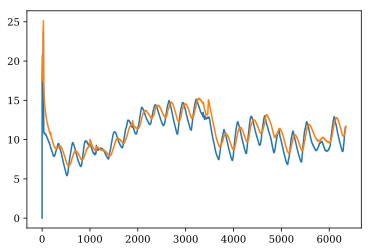

In [38]:
plt.plot(T10)
plt.plot(alt10)

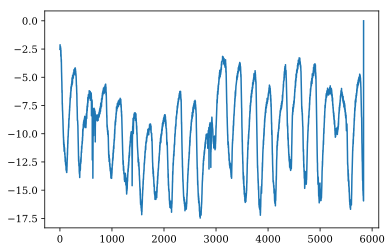

In [58]:
minmax = [fluxstats[500:,3], fluxstats[500:,2]]
# plt.errorbar(fluxstats[500:,4],fluxstats[500:,0], yerr = minmax)
plt.plot(fluxstats[500:,5])
# plt.plot(fluxstats[500:,2])
# plt.plot(fluxstats[500:,3])
# plt.plot(fluxstats[500:,5])

1.4796304995132187e-06


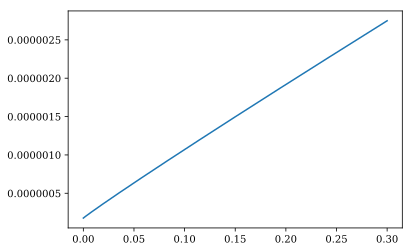

In [27]:
plt.plot(z,x_opt.x[0]*(1+x_opt.x[1]*(z/lz)**x_opt.x[2]))
alpha = x_opt.x[0]*(1+x_opt.x[1]*(z/lz)**x_opt.x[2])
print(np.mean(alpha))

In [ ]:
plt.plot(T10-alt10[:len(T10)])
plt.ylim(-1,1)

In [ ]:
def simulation_constant_alpha():
    global z,lz
    dt = 5*60.
    n10 = 54
    T_ini = 20.
    dt_2 = dt / 2
    alpha = 7.9e-7

    # k = #0.48
    rho = 500.
    def Cp(T):
        return 3.867 *(T + 273.15) +103.1



    a_metrics = np.zeros(nz-2)
    c_metrics = np.zeros(nz-2)
    a_metrics[:] = 1. / ((z[1:-1] - z[0:-2])*(z[2:]-z[0:-2]))
    c_metrics[:] = 1. / ((z[2:] - z[1:-1])*(z[2:]-z[0:-2]))
    dz = nufd(z)

    a_rhs = np.zeros(nz-2)
    b_rhs = np.zeros(nz-2)
    c_rhs = np.zeros(nz-2)
    a_lhs = np.zeros(nz-2)
    b_lhs = np.zeros(nz-2)
    c_lhs = np.zeros(nz-2)
    flux = np.zeros(nz)
    T = T_ini*np.ones(nz)
    Sim_time = 22*24*3600

    Nt = int(Sim_time/dt)
    T10 = np.zeros(Nt+1)
    fluxstats = np.zeros((Nt+1,6))
    Sim_t = 0
    T[0] = bottom_T(0)
    T[-1] = top_T(0)
    i = 0
    isample = 0
    def k(x):
        global z,lz
        return x[0]*(1+(z/lz)**2)
    while Sim_t < Sim_time:
        
        Sim_t += dt
        a_rhs = np.copy(a_lhs)
        b_rhs = np.copy(b_lhs)
        c_rhs = np.copy(c_lhs)

        T_old = np.copy(T)
        T[0] = bottom_T(i)
        T[-1] = top_T(i)

        error = np.inf
        Titold = np.copy(T)
        j = 0
        while error > 1e-4 and j < 100:
            alpha_total_all = np.ones(nz)*alpha
            a_lhs, b_lhs, c_lhs = diffusion_matrix_coefficients(alpha_total_all)
            d = rhs_T(a_rhs, b_rhs, c_rhs, a_lhs, c_lhs, T_old, T)
        #     print(d)
            T[1:-1] = TDMAsolver(-a_lhs, 1-b_lhs , -c_lhs, d)
            error = np.linalg.norm(T-Titold,2)/np.mean(T)
            Titold = np.copy(T)
            j += 1
        print(j,error)
        dTdz = dz*T
        flux = -5.5e5*alpha_total_all*dTdz
        fluxstats[i,0] = np.mean(flux)
        fluxstats[i,1] = np.std(flux)
        fluxstats[i,2] = np.amax(flux)
        fluxstats[i,3] = np.amin(flux)
        fluxstats[i,4] = i
        fluxstats[i,5] = np.trapz(y=flux,x=z)/lz
        i += 1
        T10[i] = T[n10]
        print(i,Sim_t/Sim_time*100)
        clear_output(wait=True)
        Ntime = i-1
    return T10,fluxstats

In [ ]:
T10_cst, fluxstats_cst = simulation_constant_alpha()

In [ ]:
plt.plot(T10,lw = 2, label=r"Optimized $\alpha$")
plt.plot(T10_cst,lw = 2, label=r"$\alpha=7.9\times10^{-7}\mathrm{m}^2/\mathrm{s}$")
plt.plot(alt10,'k--', lw =1, label="HOBO")
plt.legend(loc=3, bbox_to_anchor=[0, 1.], ncol=2, shadow=False, fancybox=True)
plt.ylabel(r"$T\;(^\circ\mathrm{C})$ at 10 cm")
plt.xlabel("sample number")
plt.savefig("model_perf_811_934.pdf",bbox_inches='tight')
plt.show()